### Objective
##### 1. Determine customer country based on the numeric IP address.
##### 2. Build a model to predict whether an activity is fraudulent or not
##### 3. Explain how different assumptions about the cost of false positives vs false negatives would impact the model.
##### 4. Explain the models in the most simply way
##### 5. Evaluate and choose the best fit model

### Data Sources
##### 1. “Fraud_data”: information about the user first transaction. 

Columns:

•	user_id: unique id of the user

•	Signup_time: the time when the user created account (GMT time)

•	purchase_time: the value of the first transaction (USD)

•	device_id: unique id by device, may have the case that 2 transactions with the same device_id.

•	source: Marketing channels (SEO, Ads, Direct)

•	browser: the browser user use to purchase

•	sex: user gender (Male/ Female)

•	age: user age

•	ip_address: user numeric ip address

•	class: idetify whether an activity was fraudulent(1) or not (0)



##### 2. “IpAddress_to_Country”: the list of ip address with its country. Each country have a range and a numeric ip address falls within the range will belong to that country

Columns:

•	lower_bound_ip_address: the lower bound numeric ip address

•	upper_bound_ip_address: the upper bound numeric ip address

•	country: corresponding country

## Index
### A. Import library, data and data exploration
### B. Data Manipulate
### C. Exploratory Data Analysis
### D. Data Preprocessing
### E. Feature Selection
### F. Predictive Models
### G. Model Evaluation
### H. Analysis

### A. Import library, data and data exploration

In [1]:
!pip install ipython_memwatcher
!pip install graphviz
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.ensemble import ExtraTreesClassifier

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz 
from sklearn.tree import export_graphviz

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import data from csv file
fraud_data= pd.read_csv('Fraud_Data.csv')
ip = pd.read_csv('IpAddress_to_Country.csv')

In [3]:
pd.set_option('display.expand_frame_repr', False) #show all columns in dataset
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [4]:
#Check 5 top and bottom rows
fraud_data.head()

user_id          signup_time        purchase_time  purchase_value      device_id source browser sex  age    ip_address  class
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

In [5]:
fraud_data.tail()

user_id          signup_time        purchase_time  purchase_value      device_id  source browser sex  age    ip_address  class
151107   345170  2015-01-27 03:03:34  2015-03-29 00:30:47              43  XPSKTWGPWINLR     SEO  Chrome   M   28  3.451155e+09      1
151108   274471  2015-05-15 17:43:29  2015-05-26 12:24:39              35  LYSFABUCPCGBA     SEO  Safari   M   32  2.439047e+09      0
151109   368416  2015-03-03 23:07:31  2015-05-20 07:07:47              40  MEQHCSJUBRBFE     SEO      IE   F   26  2.748471e+09      0
151110   207709  2015-07-09 20:06:07  2015-09-07 09:34:46              46  CMCXFGRHYSTVJ     SEO  Chrome   M   37  3.601175e+09      0
151111   138208  2015-06-10 07:02:20  2015-07-21 02:03:53              20  ZINIADFCLHYPG  Direct      IE   M   38  4.103825e+09      0

In [6]:
#Check data infomation
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [7]:
#check number of Null value
fraud_data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [8]:
#Check 5 top and bottom rows
print (ip.head())
print(ip.tail())

   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China
        lower_bound_ip_address  upper_bound_ip_address    country
138841            3.758092e+09              3758093311  Hong Kong
138842            3.758093e+09              3758094335      India
138843            3.758095e+09              3758095871      China
138844            3.758096e+09              3758096127  Singapore
138845            3.758096e+09              3758096383  Australia


In [9]:
#Check data infomation
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [10]:
#check number of Null value
ip.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

### B.  Data Manipulate

#### 1. Find country

In [11]:
data=fraud_data.sort_values("ip_address").reset_index(drop=True) #sort by ip_address for faster search
country=[]
min_ip=min(ip.iloc[:,0])
max_ip=max(ip.iloc[:,1])
#define a Funtion to find country code from an Ip Code
def get_ip(ip_code):
    if len(ip.loc[(ip.lower_bound_ip_address < ip_code) & (ip.upper_bound_ip_address>ip_code), 'country'])==0: #to filter the IP codes not in csv file
        return "None"
    else:
        return ip.loc[(ip.lower_bound_ip_address < ip_code) & (ip.upper_bound_ip_address>ip_code), 'country'].values[0] #return the country when Ip Code in the range from lower and upper level
# Because already sort the IP Code so gie the Ip Code lower or higher than the threshole a name of "None"
data['country'] = data.apply(lambda r: "None" if (r['ip_address'] < min_ip) or (r['ip_address'] > max_ip) else get_ip(r['ip_address']),axis=1)

#### 2. Calculate interday from the day of sign up and purchase day

In [12]:
data.signup_time=data.signup_time.astype('M8[us]') # Convert to timedate type
data.purchase_time=data.purchase_time.astype('M8[us]')  # Convert to timedate type
data['Interday_signup_purchase']=data.purchase_time-data.signup_time #Calculate Interday
data['Interday_signup_purchase']=data['Interday_signup_purchase'].dt.days #Rounded to number of days

In [13]:
data.sample(100) # get sample of 100 cases

user_id         signup_time       purchase_time  purchase_value      device_id  source  browser sex  age    ip_address  class             country  Interday_signup_purchase
103457   224677 2015-01-01 01:35:01 2015-01-17 13:29:08              25  INDVLGUPQNQIP  Direct       IE   M   20  2.956688e+09      1  Russian Federation                        16
9270     313135 2015-06-10 01:46:00 2015-09-06 11:45:43              25  PVIPGSHNHWPAB     SEO    Opera   F   30  2.535425e+08      0       United States                        88
102857   305409 2015-01-21 14:56:33 2015-02-03 20:37:41              24  GMQFWFRBYUNBH  Direct       IE   F   33  2.938884e+09      0               China                        13
102442   317142 2015-01-07 14:55:46 2015-03-18 21:36:31             106  JGBIZVBYYFPDE  Direct   Chrome   F   21  2.926001e+09      0       United States                        70
63860    281567 2015-03-28 19:02:05 2015-04-19 11:53:18              28  FUYTPFEFFFUXM     SEO   Safari   M   28  1.833628e+09      0      United Kingdom                        21
73216    117741 2015-01-09 23:53:16 2015-03-15 10:48:24              25  FDDZPNATLHRFB     SEO       IE   M   35  2.090779e+09      0           Hong Kong                        64
46349     97810 2015-03-20 20:00:12 2015-07-02 20:34:54              67  ZMYXTCZZOASRQ  Direct   Safari   M   20  1.320211e+09      0              Turkey                       104
33271    214042 2015-06-16 07:22:55 2015-07-05 09:22:15              30  IVFANXHHYMNIR     SEO   Safari   M   18  9.424570e+08      0       United States                        19
144949   238539 2015-01-30 19:48:57 2015-04-16 04:51:49              22  PSBPWOCRUEHNK     SEO       IE   F   25  4.124695e+09      0                None                        75
109830   348669 2015-01-13 08:13:07 2015-01-27 11:48:39              17  XPNQOUWXXOLVT     SEO   Safari   F   32  3.147096e+09      0              Mexico                        14
105826   348961 2015-02-04 09:31:28 2015-05-17 23:34:36              30  ESQYJDCGQVXUW     Ads       IE   F   27  3.020622e+09      0               Japan                       102
7359      68185 2015-05-19 06:36:39 2015-05-21 12:35:21              39  KXXJZYDGMHDNS     Ads       IE   M   57  2.036530e+08      0       United States                         2
90260     46118 2015-06-15 23:11:09 2015-10-03 05:03:15              71  PINMVERGLHZRN     Ads   Safari   F   46  2.561801e+09      0       United States                       109
77105    220208 2015-03-28 10:36:28 2015-05-15 01:50:23              32  ZRHKYBQGMEOWM     Ads   Chrome   M   45  2.198023e+09      0       United States                        47
97684    339592 2015-08-09 05:21:32 2015-09-03 18:20:24              57  KRUBYVYTIVVCC     Ads   Safari   M   34  2.789676e+09      0       United States                        25
108689   352308 2015-06-21 15:16:05 2015-10-03 06:40:45              28  KRJFQBMPCNHTD     Ads   Chrome   F   43  3.101641e+09      0       United States                       103
122586    18007 2015-01-29 14:55:26 2015-02-05 19:13:05              53  GGUWPFBPKDLMO     SEO   Chrome   M   44  3.509625e+09      0       United States                         7
107225   146472 2015-03-30 00:24:14 2015-05-01 03:20:20              17  ZCCBJKABERIKV  Direct  FireFox   F   53  3.061553e+09      0               China                        32
136072   336069 2015-06-10 02:51:14 2015-06-18 23:42:19              45  TRBSPEFEKFVOZ     SEO   Chrome   F   32  3.877061e+09      0                None                         8
140131    25833 2015-06-16 12:11:49 2015-07-28 05:20:04              23  LVDZKAQAWIRDD     SEO  FireFox   M   29  3.993051e+09      0                None                        41
30463    367829 2015-08-03 13:02:15 2015-11-12 22:47:53              53  HIUOJHUDTXDHU     SEO       IE   F   24  8.478847e+08      0       United States                       101
99817     40510 2015-05-21 06:36:00 2015-09-03 0

### C. Exploratory Data Analysis

#### 1. Class

0    136961
1     14151
Name: class, dtype: int64


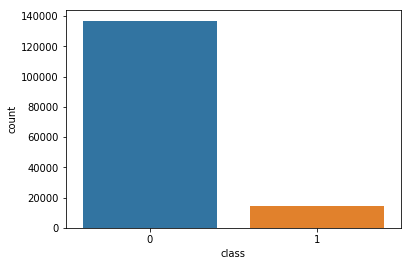

In [14]:
%matplotlib inline
print(data['class'].value_counts())
sns.countplot(x='class',data=data)

In [15]:
data.groupby('class').mean()

user_id  purchase_value        age    ip_address  Interday_signup_purchase
class                                                                                  
0      200098.920123       36.929418  33.122356  2.154235e+09                 59.584152
1      200869.065366       36.993004  33.318281  2.131918e+09                 27.822415

##### Comment:
- The fraudulent cases is 9.4% total cases. This cause an imbalance in our data. In our model, we will consider using multiple models and performance metrics to cope with the imbalance data.
- The average of purchase value and age of those 2 classes are quite similar but the average interday for fraudulent transactions are much smaller than valid ones. This suggests that interday will be one of the most important variables to predict fraud.

#### 2. Class and Source

Text(0,0.5,'Proportion of Fraud')

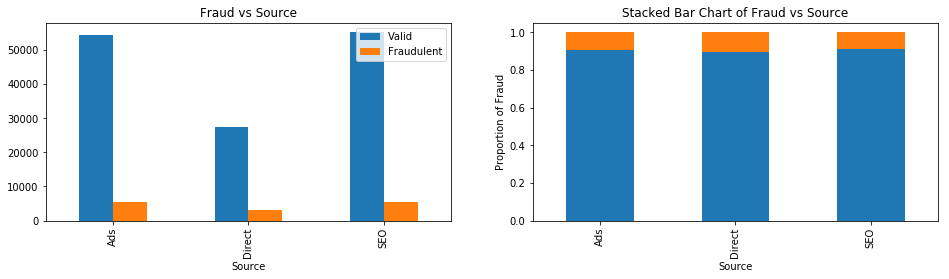

In [16]:
%matplotlib inline
plt.gcf().set_size_inches(16,8)
table=pd.crosstab(data.source,data['class'])
table.plot(kind='bar',ax=plt.subplot(221))
plt.title('Fraud vs Source')
plt.xlabel('Source')
plt.legend(labels=['Valid','Fraudulent'], loc=1, fontsize=10) #show graph's legend
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',legend=None, stacked=True, ax=plt.subplot(222))
plt.title('Stacked Bar Chart of Fraud vs Source')
plt.xlabel('Source')
plt.ylabel('Proportion of Fraud')

##### Comment:
- Transactions come mostly from Ads and SEO.
- Proportions of fraud for 3 sources are quite similar but ratio for Direct transactions is a little bit higher

#### 3. Fraud class and Browser

Text(0,0.5,'Proportion of Fraud')

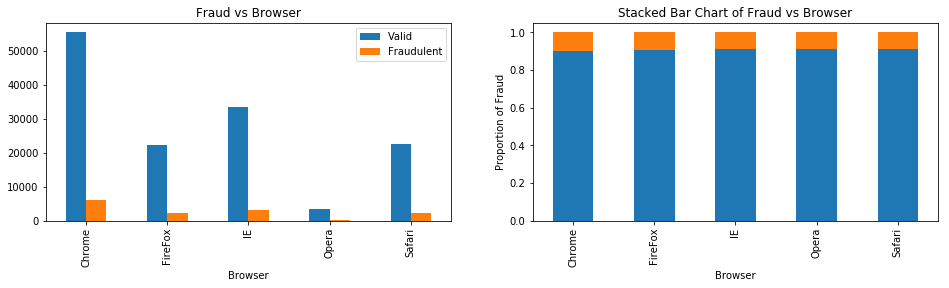

In [17]:
%matplotlib inline
plt.gcf().set_size_inches(16,8)
table=pd.crosstab(data.browser,data['class'])
table.plot(kind='bar',ax=plt.subplot(221))
plt.title('Fraud vs Browser')
plt.xlabel('Browser')
plt.legend(labels=['Valid','Fraudulent'], loc=1, fontsize=10) #show graph's legend
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',legend=None, stacked=True, ax=plt.subplot(222))
plt.title('Stacked Bar Chart of Fraud vs Browser')
plt.xlabel('Browser')
plt.ylabel('Proportion of Fraud')

##### Comment:
- Chrome is the most popular browser and Internet Explorer is in the second place. 
- The proportions of fraud are in the same level between browsers but Chrome and Firefox are slightly bigger

#### 4. Fraud and Gender

Text(0,0.5,'Proportion of Fraud')

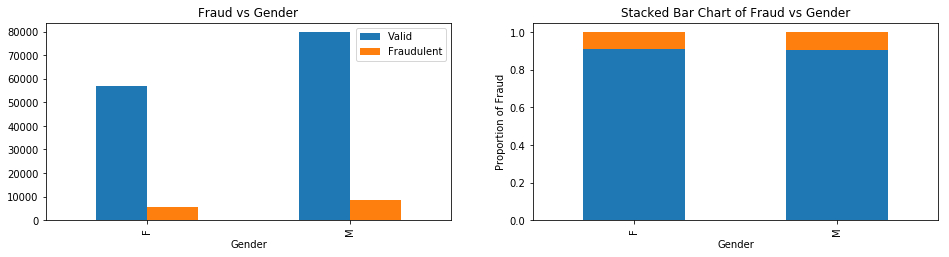

In [18]:
%matplotlib inline
plt.gcf().set_size_inches(16,8)
table=pd.crosstab(data.sex,data['class'])
table.plot(kind='bar',ax=plt.subplot(221))
plt.title('Fraud vs Gender')
plt.xlabel('Gender')
plt.legend(labels=['Valid','Fraudulent'], loc=1, fontsize=10) #show graph's legend
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', legend=None, stacked=True, ax=plt.subplot(222))
plt.title('Stacked Bar Chart of Fraud vs Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Fraud')

##### Comment:
- More male customers than female
- Transactions from male customers also at a bit higher risk than female

#### 5. Fraud and Age

In [19]:
print ("Average age: ", data.age.mean())
print ("Median age: ", data.age.median())

Average age:  33.14070358409656
Median age:  33.0


Text(0,0.5,'Proportion of Fraud')

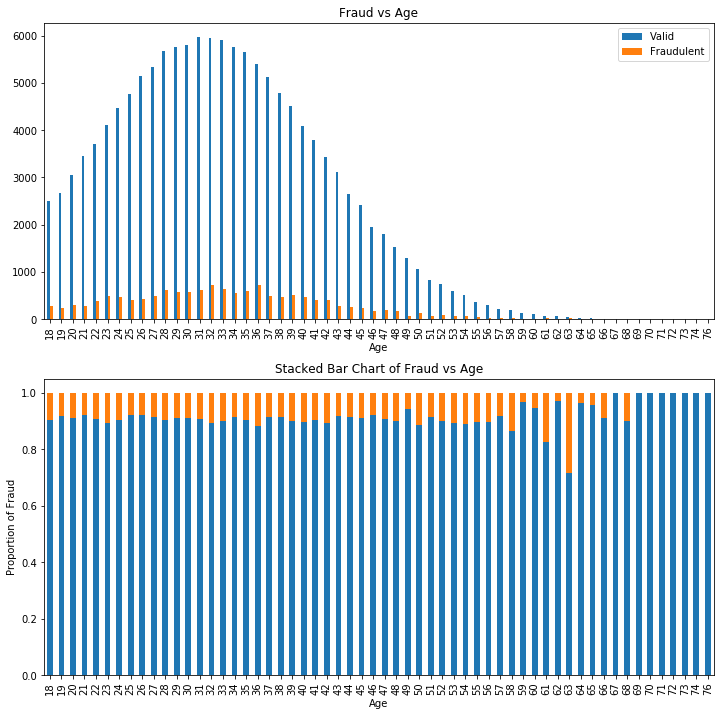

In [20]:
%matplotlib inline
plt.gcf().set_size_inches(12,12)
table=pd.crosstab(data.age,data['class'])
table.plot(kind='bar',ax=plt.subplot(211))
plt.title('Fraud vs Age')
plt.xlabel('Age')
plt.legend(labels=['Valid','Fraudulent'], loc=1, fontsize=10) #show graph's legend

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',legend=None, stacked=True, ax=plt.subplot(212))
plt.title('Stacked Bar Chart of Fraud vs Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Fraud')

##### Comment:
- Customer age ranges from 18 to 76.
- Average age is 33.14 and Median age:  33.0
- Higher rate of fraud is from group of 63 y.o where around 30% transaction are fraudulent. Second risk group is 61 y.o with around 20% fraud

#### 6. Fraud and Purchase value

In [21]:
print ("Average purchase value: ", data.purchase_value.mean())
print ("Median purchase value: ", data.purchase_value.median())

Average purchase value:  36.93537243898565
Median purchase value:  35.0


Text(0,0.5,'Proportion of Fraud')

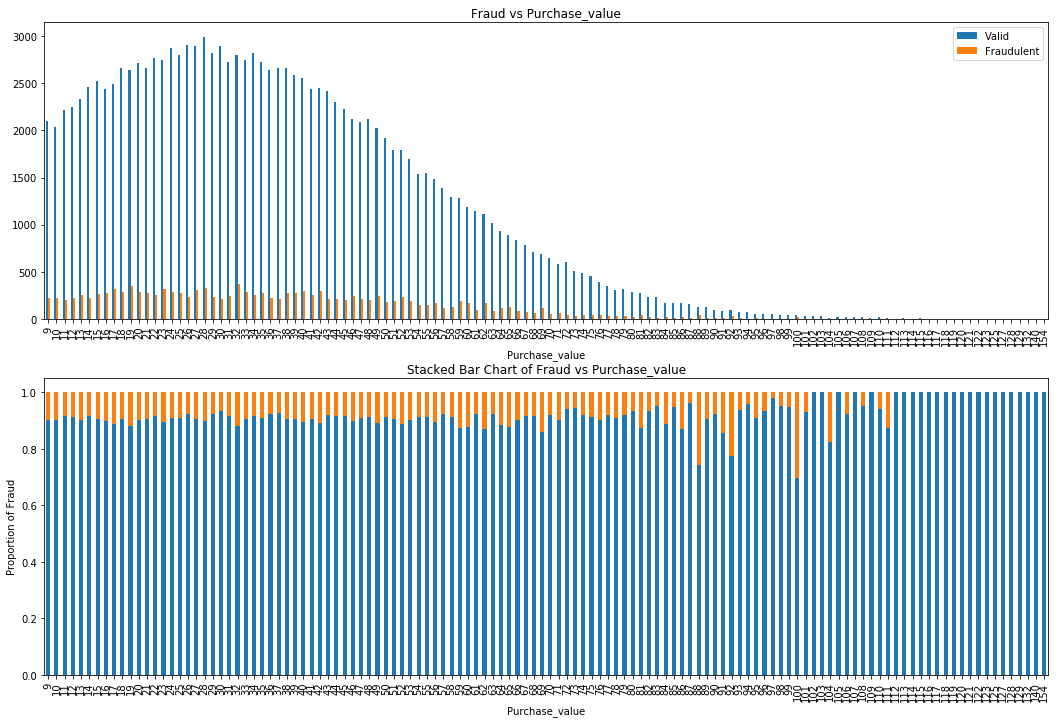

In [22]:
%matplotlib inline
plt.gcf().set_size_inches(18,12)
table=pd.crosstab(data.purchase_value,data['class'])
table.plot(kind='bar',ax=plt.subplot(211))
plt.title('Fraud vs Purchase_value')
plt.xlabel('Purchase_value')
plt.legend(labels=['Valid','Fraudulent'], loc=1, fontsize=10) #show graph's legend

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',legend=None, stacked=True, ax=plt.subplot(212))
plt.title('Stacked Bar Chart of Fraud vs Purchase_value')
plt.xlabel('Purchase_value')
plt.ylabel('Proportion of Fraud')

##### Comment:
- Lowest purchase value is 9 and the highest is 154
- Average purchase value is 36.94 and Median purchase value is 35.0
- 3 most fraudulent transactions are with values of 100, 88 and 92 (25-30% of fraud)

#### 7. Fraud and Country

Text(0,0.5,'Proportion of Fraud')

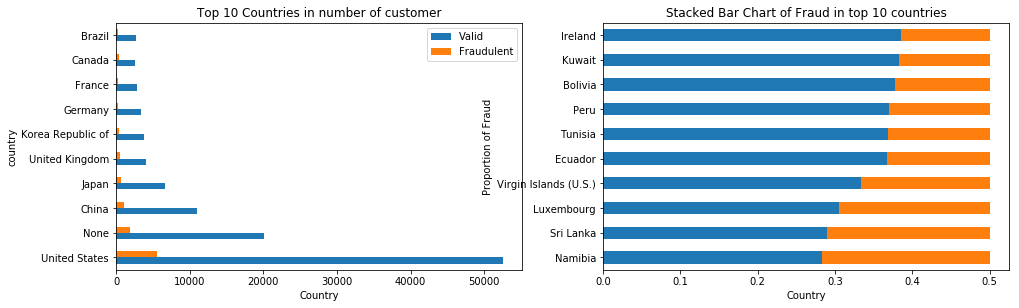

In [23]:
%matplotlib inline
plt.gcf().set_size_inches(16,10)
table=data.pivot_table(["user_id"],index='country',columns="class",aggfunc="count", margins=True)
table1=table.sort_values(by=('user_id','All'), ascending=False).iloc[1:11,0:2]
table1.plot(kind='barh', stacked=False, ax=plt.subplot(221))
plt.title('Top 10 Countries in number of customer')
plt.xlabel('Country')
plt.legend(labels=['Valid','Fraudulent'], loc=1, fontsize=10) #show graph's legend
table2=table.div(table.sum(1).astype(float), axis=0).sort_values(by=('user_id',1), ascending=False).iloc[1:11,0:2]
table2.plot(kind='barh', legend=None, stacked=True, ax=plt.subplot(222))
plt.title('Stacked Bar Chart of Fraud in top 10 countries')
plt.xlabel('Country')
plt.ylabel('Proportion of Fraud')

##### Comment:
- Nearly 1/3 of the transactions are from United States. In second is the Non-identified IP address which is marked as "None" for country. So, the number of fraudulent transaction is also the highest.
- In term of fraud rate, transactions from Namibia when nearly 50% of transactions are invalid. Second is Sri Lanka and surprisingly Luxembourg in third place. 


#### 8. Fraud and Days from sign up

Text(0,0.5,'Proportion of Fraud')

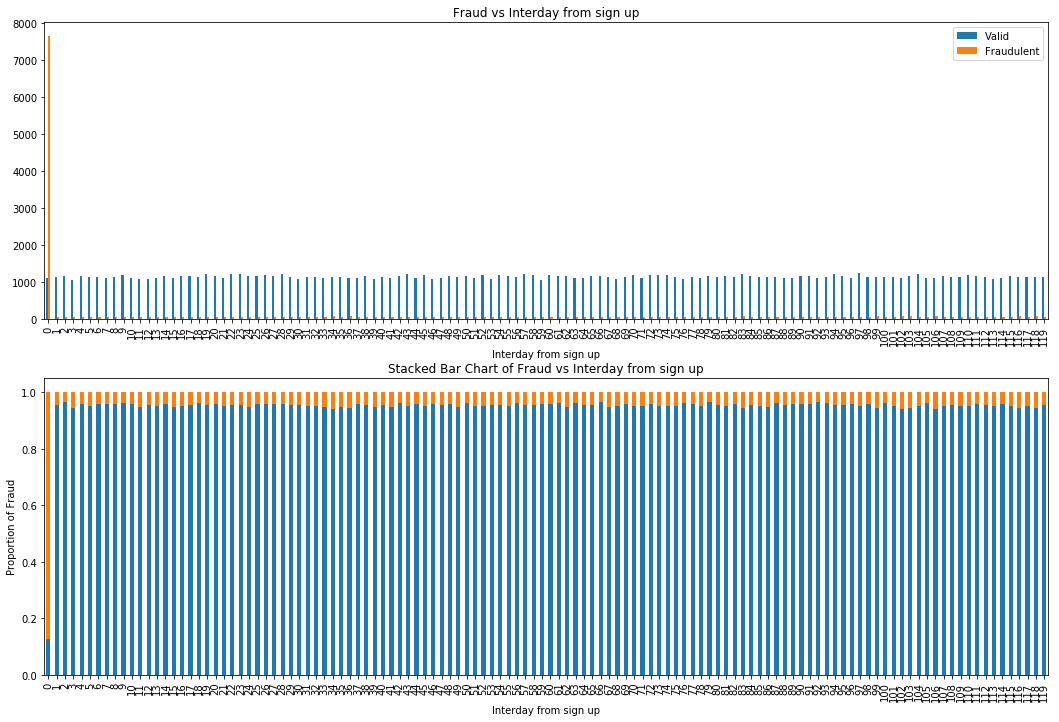

In [24]:
%matplotlib inline
plt.gcf().set_size_inches(18,12)
table=pd.crosstab(data.Interday_signup_purchase,data['class'])
table.plot(kind='bar',ax=plt.subplot(211))
plt.title('Fraud vs Interday from sign up')
plt.xlabel('Interday from sign up')
plt.legend(labels=['Valid','Fraudulent'], loc=1, fontsize=10) #show graph's legend

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',legend=None, stacked=True, ax=plt.subplot(212))
plt.title('Stacked Bar Chart of Fraud vs Interday from sign up')
plt.xlabel('Interday from sign up')
plt.ylabel('Proportion of Fraud')

##### Comment:
- The distribution of interday is quite balance in ranges. But the number of fraudulent cases fro 0 interday is significantly high with nearly 8000 cases. As we mentioned above, interday is a very important predictor.
- In very similar way, The rate of fraud for 0 interday is the highest at around 90%

### D. Data Preprocessing

#### 1. Encoding categorical variables

In [25]:
#source Ads = 0, Direct =1, SEO =2
le = preprocessing.LabelEncoder()
le.fit(data.source)
print (list(le.classes_))
data['source_code']=le.transform(data.source)

['Ads', 'Direct', 'SEO']


In [26]:
#browser 'Chrome'=0, 'FireFox'=1, 'IE'=2, 'Opera'=3, 'Safari'=4
le = preprocessing.LabelEncoder()
le.fit(data.browser)
print (list(le.classes_))
data['browser_code']=le.transform(data.browser)

['Chrome', 'FireFox', 'IE', 'Opera', 'Safari']


In [27]:
#sex Female= 0, Male =1
le = preprocessing.LabelEncoder()
le.fit(data.sex)
print (list(le.classes_))
data['sex_code']=le.transform(data.sex)

['F', 'M']


In [28]:
data.country.nunique()

182

In [29]:
#There are 182 countries in our data, each country will receive a code
le = preprocessing.LabelEncoder()
le.fit(data.country)
print (list(le.classes_))
data['country_code']=le.transform(data.country)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire; Sint Eustatius; Saba', 'Bosnia and Herzegowina', 'Botswana', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Congo', 'Congo The Democratic Republic of The', 'Costa Rica', "Cote D'ivoire", 'Croatia (LOCAL Name: Hrvatska)', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'European Union', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guadeloupe', 'Guam', 'Guatemala', 'Haiti', 'Honduras', 'Hong 

In [30]:
data.head()

user_id         signup_time       purchase_time  purchase_value      device_id  source  browser sex  age     ip_address  class country  Interday_signup_purchase  source_code  browser_code  sex_code  country_code
0    62421 2015-02-16 00:17:05 2015-03-08 10:00:39              46  ZCLZTAJPCRAQX  Direct   Safari   M   36   52093.496895      0    None                        20            1             4         1           124
1   173212 2015-03-08 04:03:22 2015-03-20 17:23:45              33  YFGYOALADBHLT     Ads       IE   F   30   93447.138961      0    None                        12            0             2         0           124
2   242286 2015-05-17 16:45:54 2015-05-26 08:54:34              33  QZNVQTUITFTHH  Direct  FireFox   F   32  105818.501505      0    None                         8            1             1         0           124
3   370003 2015-03-03 19:58:39 2015-05-28 21:09:13              33  PIBUQMBIELMMG     Ads       IE   M   40  117566.664867      0    None                        86            0             2         1           124
4   119824 2015-03-20 00:31:27 2015-04-05 07:31:46              55  WFIIFCPIOGMHT     Ads   Safari   M   38  131423.789042      0    None                        16            0             4         1           124

### E. Feature Selection

In [31]:
data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class', 'country', 'Interday_signup_purchase', 'source_code', 'browser_code', 'sex_code', 'country_code'], dtype='object')

In [32]:
Y=data['class'] #Y: Target
X=data.drop(['user_id','class','signup_time', 'purchase_time', 'device_id', 'source', 'browser', 'sex', 'ip_address', 'country'], axis=1)
#X: Predictor

##### Comment
- We will only use the variables with numeric values in our models so I only select those variables. 
- In this step I seperate 

#### 1. Pearson Correlation

                          purchase_value       age  Interday_signup_purchase  source_code  browser_code  sex_code  country_code
purchase_value                  1.000000  0.002370                  0.003422     0.000417     -0.001727  0.001996     -0.003736
age                             0.002370  1.000000                 -0.000570    -0.000875      0.002176  0.004093      0.004073
Interday_signup_purchase        0.003422 -0.000570                  1.000000     0.003772      0.013028 -0.005210     -0.000380
source_code                     0.000417 -0.000875                  0.003772     1.000000      0.004397  0.001025     -0.001991
browser_code                   -0.001727  0.002176                  0.013028     0.004397      1.000000  0.000002      0.000742
sex_code                        0.001996  0.004093                 -0.005210     0.001025      0.000002  1.000000     -0.001873
country_code                   -0.003736  0.004073                 -0.000380    -0.001991      0.000742 

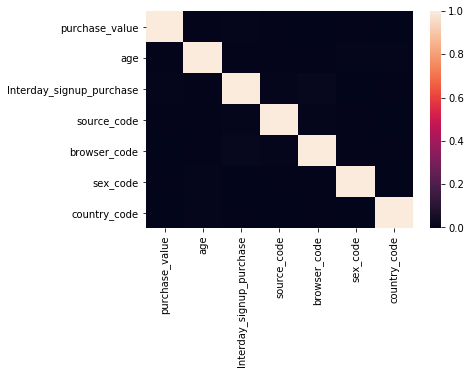

In [33]:
%matplotlib inline
# calculate the correlation matrix
corr = X.corr()
print(corr)
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

##### Comment
- There is no high correlated between features. So we can use all the variables.

#### 2. Feature selection:

In [34]:
model = LogisticRegression()
rfe = RFE(model, 7)
fit = rfe.fit(X,Y)
print(("Num Features: %d") % fit.n_features_)

print("Selected Features:")
print(pd.DataFrame(list(zip(X.columns.tolist(), fit.support_)),columns=["Var","Selection"]).set_index("Var").iloc[:,0:2])
print("Feature Ranking:")
print(pd.DataFrame(list(zip(X.columns.tolist(), fit.ranking_)),columns=["Var","Rank"]).set_index("Var").iloc[:,0:2])

Num Features: 7
Selected Features:
                          Selection
Var                                
purchase_value                 True
age                            True
Interday_signup_purchase       True
source_code                    True
browser_code                   True
sex_code                       True
country_code                   True
Feature Ranking:
                          Rank
Var                           
purchase_value               1
age                          1
Interday_signup_purchase     1
source_code                  1
browser_code                 1
sex_code                     1
country_code                 1


##### Comment
- We base on the Logistic regression to choose the feature by include each variable in the model and test the significance of the model. 
- All 7 variables are selected in this case and all rank the same.

#### 3. PCA

Explained Variance: [0.1451291  0.14371653 0.14363635 0.1428955  0.14222066 0.14172441
 0.14067745]


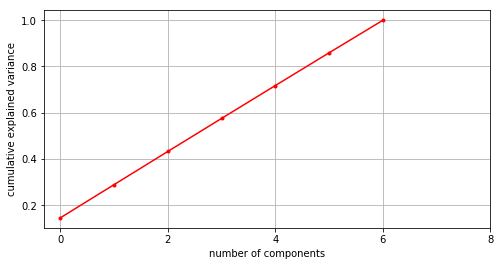

In [35]:
%matplotlib inline
X_std = StandardScaler().fit_transform(X) #Standardize all values
pca = PCA(n_components=7)
fit = pca.fit(X_std)
# summarize components
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
plt.plot(np.cumsum(fit.explained_variance_ratio_), c='red',marker = ".")
plt.xticks(np.arange(0, 10,2))
plt.gcf().set_size_inches(8,4)
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### Comment
- In PCA, we need to standardize the data 
- The variances for all 7 variables are similar so PCA can not help us to define new PCs. 

#### 4. Importance Ranking

                          Importance
Var                                 
Interday_signup_purchase    0.499284
purchase_value              0.193858
age                         0.161634
country_code                0.102225
browser_code                0.023925
source_code                 0.013521
sex_code                    0.005554


Text(0.5,0,'Importance')

<Figure size 576x432 with 0 Axes>

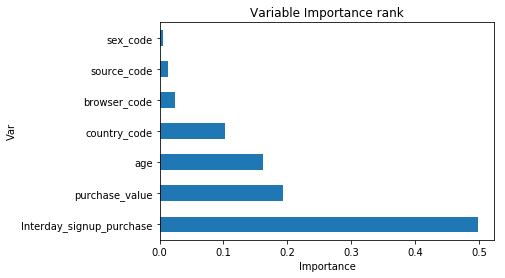

In [36]:
%matplotlib inline
plt.gcf().set_size_inches(8,6)
model = ExtraTreesClassifier()
model.fit(X,Y)
importance= pd.DataFrame(list(zip(X.columns,model.feature_importances_)),columns=["Var","Importance"])
importance=importance.sort_values(by="Importance",ascending=False).set_index("Var")
print(importance)
importance.plot(kind='barh',legend= None)
plt.title('Variable Importance rank')
plt.xlabel('Importance')

##### Comment
- Interday is the most important feature.
- Second is Purchase value and third is age. 
- Less important variable is sex_code.


##### => we include all features in the model

### F. Predictive Models

#### 1. Logistic Regression

In [37]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.276736
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:               151112
Model:                          Logit   Df Residuals:                   151105
Method:                           MLE   Df Model:                            6
Date:                Sat, 11 Aug 2018   Pseudo R-squ.:                  0.1099
Time:                        13:15:03   Log-Likelihood:                -41818.
converged:                       True   LL-Null:                       -46980.
                                        LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
purchase_value              -0.0039      0.000     -8.260      0.000      -0.005

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 2. Decision Tree - Gini Index

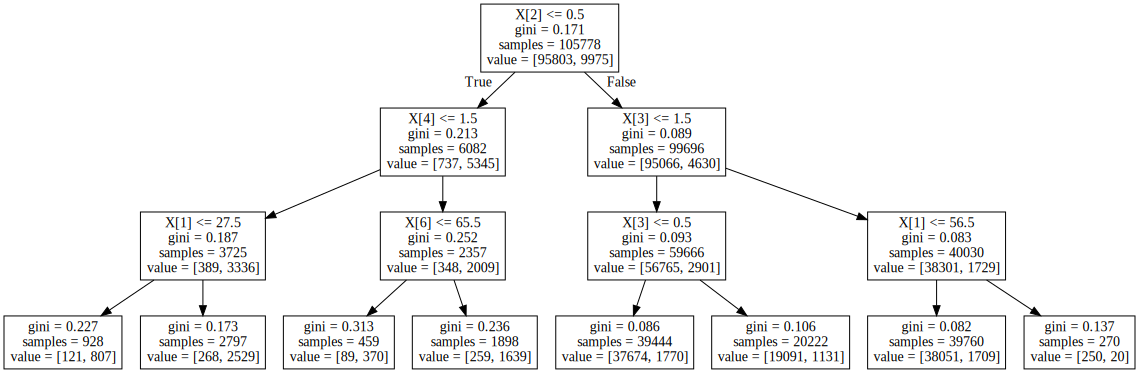

In [39]:
%matplotlib inline
gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
gini.fit(X_train, y_train)
dot_data = tree.export_graphviz(gini, out_file=None) 
graph = graphviz.Source(dot_data)
graph

#### 3. Decision Tree- Entropy

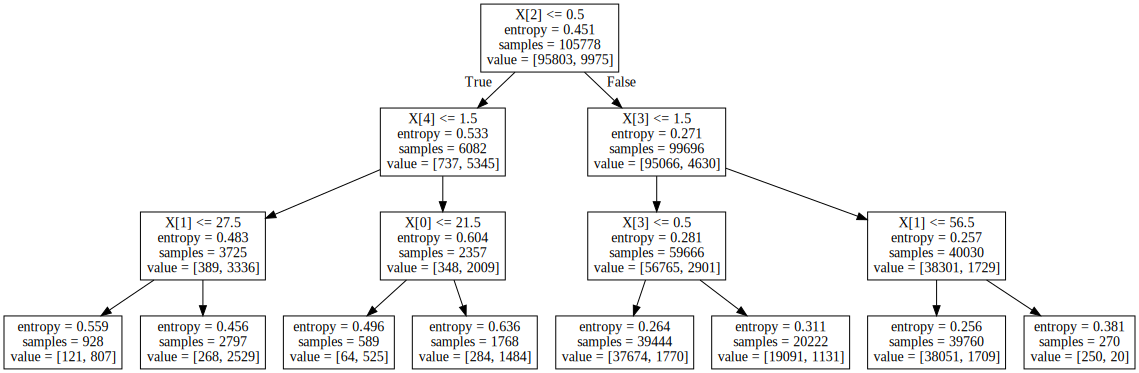

In [40]:
%matplotlib inline
entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
entropy.fit(X_train, y_train)
dot_data = tree.export_graphviz(entropy, out_file=None) 
graph = graphviz.Source(dot_data)
graph

#### 4. Neural Network

In [41]:
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, Y, test_size=0.3, random_state=0)
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(hidden_layer_sizes=(10,10,10))
NN.fit(X_std_train,y_std_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

#### 5. Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

### G. Model Evaluation

#### 1. Logistic Regression

In [43]:
print("1. Logistic Regression")
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)
print('a. Accuracy: {:.2f}'.format(logreg.score(X_test, y_test)*100))
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("b. Accuracy for 10-fold cross validation: %.2f" % (results.mean()*100))
print("c. Confusion matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("d. Classification Report")
print(classification_report(y_test, y_pred_log))


1. Logistic Regression
a. Accuracy: 90.79
b. Accuracy for 10-fold cross validation: 90.57
c. Confusion matrix:
[[41158     0]
 [ 4176     0]]
d. Classification Report
             precision    recall  f1-score   support

          0       0.91      1.00      0.95     41158
          1       0.00      0.00      0.00      4176

avg / total       0.82      0.91      0.86     45334



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 2. Decision Tree - Gini Index

In [44]:
print("2. Decision Tree- Gini Index")
y_pred_gini = gini.predict(X_test)
y_prob_gini= gini.predict_proba(X_test)
print('a. Accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred_gini)*100))
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("b. Accuracy for 10-fold cross validation: %.3f" % (results.mean()*100))
print("c. Confusion matrix:")
print(confusion_matrix(y_test, y_pred_gini))
print("d. Classification Report")
print(classification_report(y_test, y_pred_gini))


2. Decision Tree- Gini Index
a. Accuracy: 95.046
b. Accuracy for 10-fold cross validation: 94.926
c. Confusion matrix:
[[40785   373]
 [ 1873  2303]]
d. Classification Report
             precision    recall  f1-score   support

          0       0.96      0.99      0.97     41158
          1       0.86      0.55      0.67      4176

avg / total       0.95      0.95      0.95     45334



#### 3. Decision Tree- Entropy

In [45]:
print("3. Decision Tree- Entropy")
y_pred_en = entropy.predict(X_test)
y_prob_en= entropy.predict_proba(X_test)
print('a. Accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred_en)*100))
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("b. Accuracy for 10-fold cross validation: %.3f" % (results.mean()*100))
print("c. Confusion matrix:")
print(confusion_matrix(y_test, y_pred_en))
print("d. Classification Report")
print(classification_report(y_test, y_pred_en))


3. Decision Tree- Entropy
a. Accuracy: 95.046
b. Accuracy for 10-fold cross validation: 94.926
c. Confusion matrix:
[[40785   373]
 [ 1873  2303]]
d. Classification Report
             precision    recall  f1-score   support

          0       0.96      0.99      0.97     41158
          1       0.86      0.55      0.67      4176

avg / total       0.95      0.95      0.95     45334



#### 4. Neural Network

In [46]:
print("4. Neural Network")
y_pred_NN = NN.predict(X_std_test)
y_prob_NN= NN.predict_proba(X_std_test)
print('a. Accuracy: {:.3f}'.format(accuracy_score(y_std_test,y_pred_NN)*100))
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = MLPClassifier(hidden_layer_sizes=(10,10,10))
results = model_selection.cross_val_score(modelCV, X_std_train, y_std_train, cv=kfold, scoring='accuracy')
print("b. Accuracy for 10-fold cross validation: %.3f" % (results.mean()*100))
print("c. Confusion matrix:")
print(confusion_matrix(y_std_test, y_pred_NN))
print("d. Classification Report")
print(classification_report(y_std_test, y_pred_NN))

4. Neural Network
a. Accuracy: 95.041
b. Accuracy for 10-fold cross validation: 94.758
c. Confusion matrix:
[[40786   372]
 [ 1876  2300]]
d. Classification Report
             precision    recall  f1-score   support

          0       0.96      0.99      0.97     41158
          1       0.86      0.55      0.67      4176

avg / total       0.95      0.95      0.95     45334



#### 5. Random Forest

In [47]:
print("5. Random Forest")
y_pred_RF = RF.predict(X_test)
y_prob_RF= RF.predict_proba(X_test)
print('a. Accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred_RF)*100))
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0)
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("b. Accuracy for 10-fold cross validation: %.3f" % (results.mean()*100))
print("c. Confusion matrix:")
print(confusion_matrix(y_test, y_pred_RF))
print("d. Classification Report")
print(classification_report(y_test, y_pred_RF))

5. Random Forest
a. Accuracy: 95.271
b. Accuracy for 10-fold cross validation: 95.073
c. Confusion matrix:
[[40891   267]
 [ 1877  2299]]
d. Classification Report
             precision    recall  f1-score   support

          0       0.96      0.99      0.97     41158
          1       0.90      0.55      0.68      4176

avg / total       0.95      0.95      0.95     45334



#### 6. ROC Curve

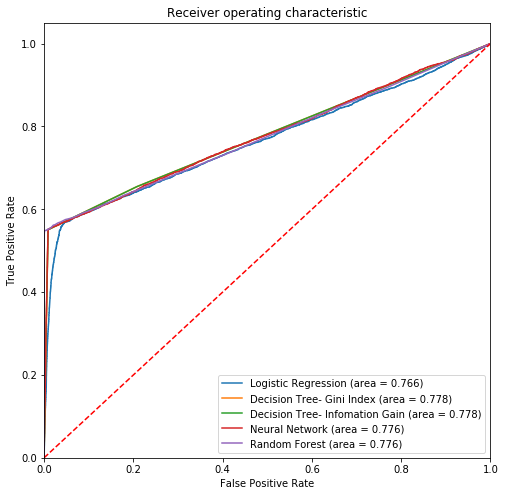

In [48]:
%matplotlib inline

plt.gcf().set_size_inches(8,8)

fpr_log, tpr_log, thresholds_log = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.3f)' % roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

y_prob_gini= gini.predict_proba(X_test)
fpr_gini, tpr_gini, thresholds_gini = metrics.roc_curve(y_test, y_prob_gini[:,1])
plt.plot(fpr_gini, tpr_gini, label='Decision Tree- Gini Index (area = %0.3f)' % roc_auc_score(y_test, y_prob_gini[:,1]))

y_prob_en= entropy.predict_proba(X_test)
fpr_en, tpr_en, thresholds_en = metrics.roc_curve(y_test, y_prob_en[:,1])
plt.plot(fpr_en, tpr_en, label='Decision Tree- Infomation Gain (area = %0.3f)' % roc_auc_score(y_test, y_prob_en[:,1]))

y_prob_NN= NN.predict_proba(X_std_test)
fpr_NN, tpr_NN, thresholds_NN = metrics.roc_curve(y_std_test, y_prob_NN[:,1])
plt.plot(fpr_NN, tpr_NN, label='Neural Network (area = %0.3f)' % roc_auc_score(y_std_test, y_prob_NN[:,1]))

y_prob_RF= RF.predict_proba(X_test)
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(y_test, y_prob_RF[:,1])
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = %0.3f)' % roc_auc_score(y_test, y_prob_RF[:,1]))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

### H. Analysis

##### 1. Model building
- We are building a classification model where we try to predict a outcome from given information. In this case, we are given many demographic and transaction data, and we will find a relationship between those features and probability of particular outcome (Fraud or Valid transaction). 
- To build a classification model, we have many methods such as Logistic Regression, Decision Tree, Neural Network or Random Forest. But in general, all the techniques will give you the probability of particular outcome from given data. 
- To access which on is the best model to predict, we base on many criteria such as the nature of data, the model accuracy, confusion matrix, ROC curve.
##### 2. Model accuracy
- Accuracy is a measurement of correct predictions made by the model or the ratio of fraud transactions classified as fraudulent transaction and valid classified as non-fraud to the total transactions in the test data.
- The most accuracy model is Random Forest with 95.27% accurate. and the lowest is logistic regression with around 90.79%. 
- The accuracy of logistics regression is only about the same as the base line of the model (90.63%)
- We double check by 10-fold cross validation to make sure the accuracy is consistent and the train- test set division is correct. 
- Because of the imbalance in data so the accuracy is not the correct criteria to evaluate the models.
##### 3. Confusion Matrix
1. Logistic Regression
 False Positive: 0
 False Negative: 4176
2. Decision Tree
 False Positive: 373
 False Negative: 1873
3. Neural Network:
 False Positive: 383
 False Negative: 1964
4. Random Forest 
 False Positive: 267
 False Negative: 1877
 
- When a transaction is predicted as fraud but it is actually valid, we have a false positive. On the other hand, when a transaction is predicted as valid and it is actually a fraud, we have a false negative.
- We expect both  False Positive and False Negative are low so we get the high accuracy but we not expect the zero for False Positive in case of Logictic regression. In this case, we allow 4176 cases of fraud transaction and this will cost us a lot.
- In case of three other model, the number of fraud transaction that allow into the system is smaller around 1800-1900 cases. Those cases are our lost. In other hand, we also wrongly predict 260-380 customers as fraud transaction but they are really not. With False Positive, we actually don't get money from customer but not lose any money to them. 
- Considered about the cost, the lower False negative is the better model. And in this case is the Random Forest model. We can also use Decision Tree.

##### 4. ROC curve
- The ROC curve recommends that Random Forest and Decision Tree are best models. 